<a href="https://colab.research.google.com/github/Mario-RJunior/relacoes-publicas-clientes-NLP/blob/main/relacoes_publicas_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Departamento de Relações Públicas

## Importação das bibliotecas e da base de dados

Base de dados: https://www.kaggle.com/sid321axn/amazon-alexa-reviews/kernels

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carregando a base de dados
link = 'https://raw.githubusercontent.com/Mario-RJunior/relacoes-publicas-clientes-NLP/main/amazon_alexa.tsv'
reviews_df = pd.read_csv(link, sep='\t')

In [3]:
reviews_df.head(10)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [4]:
# Checando número de linhas e de colunas
reviews_df.shape

(3150, 5)

In [5]:
# Visualizando alguns informaçoes
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
# Visualizando alguams estatísticas
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [7]:
# Visualizando as colunas com os textos
reviews_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

## Exploração dos dados

Iremos nesta seção gerar alguns gráficos para nos ajudar a ter uma melhor compreensão da base de dados.

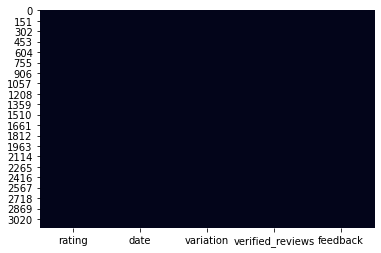

In [8]:
# Verificando valores faltantes com heatmap
sns.heatmap(data=reviews_df.isnull(), cbar=False);

In [9]:
reviews_df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

Como visto, confirmamos que não há valores nulos.

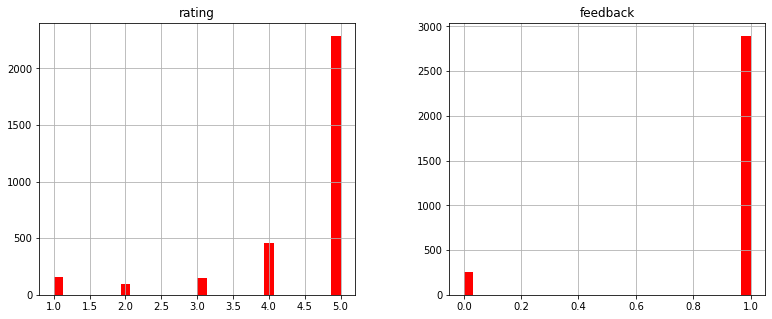

In [10]:
# Histogramas
reviews_df.hist(bins=30, figsize=(13,5), color='r');

Vemos que a maioria das notas (rating) é igual a 5, o que indica que a grande maioria das pessoas gostou dos produtos. Da mesma forma, a maior parte dos feedbacks foram positivos.

In [11]:
# Número de caracteres para coluna "verified_reviews"
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


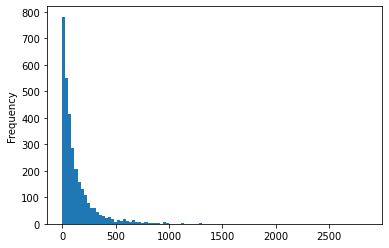

In [12]:
# Histograma para a quantidade de caracteres
reviews_df['length'].plot(kind='hist', bins=100);

Notamos que a maioria dos reviews tem cerca de 100 ou 200 caracteres.

In [13]:
# Estatísticas para coluna "length"
reviews_df['length'].describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [14]:
# Checando um dos  valores mínimo
reviews_df.query('length == 1')['verified_reviews'].iloc[0]

'😍'

In [15]:
# Checando o review máximo
reviews_df.query('length == 2851')['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [16]:
# Verificando um review com tamanho médio
reviews_df.query('length == 132')['verified_reviews'].iloc[0]

'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

Podemos agora criar dataframes com os reviews positivos e negativos baseados na coluna "feedback".

In [17]:
# Reviews positivos
positive = reviews_df.query('feedback == 1')
positive.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [18]:
positive.describe()

,rating,feedback,length
count,2893.000000,2893.0,2893.000000
mean,4.737643,1.0,124.659177
std,0.546544,0.0,174.624491
min,3.000000,1.0,1.000000
25%,5.000000,1.0,29.000000
50%,5.000000,1.0,69.000000
75%,5.000000,1.0,154.000000
max,5.000000,1.0,2851.000000


In [19]:
# Reviews negativos
negative = reviews_df.query('feedback == 0')
negative.head()

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


In [20]:
negative.describe()

,rating,feedback,length
count,257.000000,257.0,257.000000
mean,1.373541,0.0,215.241245
std,0.484688,0.0,236.325955
min,1.000000,0.0,1.000000
25%,1.000000,0.0,53.000000
50%,1.000000,0.0,137.000000
75%,2.000000,0.0,289.000000
max,2.000000,0.0,1686.000000


Comparando as estatísticas dos dois casos vemos que as pessoas satisfeitas com os produtos escrevem textos com, em média, 124 caracteres, enquanto que as pessoas que não estão tão satisfeitas escrevem, em média, com 215 caracteres.

Isso pode indicar que as pessoa que não estão satisfeitas tendem a explicar o motivo de sua insatisfação de forma detalhada, citar os problemas encontrados, etc.

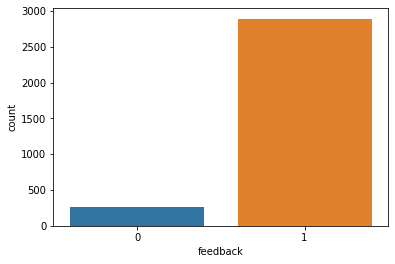

In [21]:
# Contagem de pessoas satisfeitas ou não
sns.countplot(data=reviews_df, x='feedback');

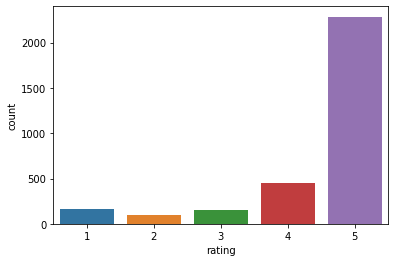

In [22]:
# Contagem dos ratings
sns.countplot(data=reviews_df, x='rating');

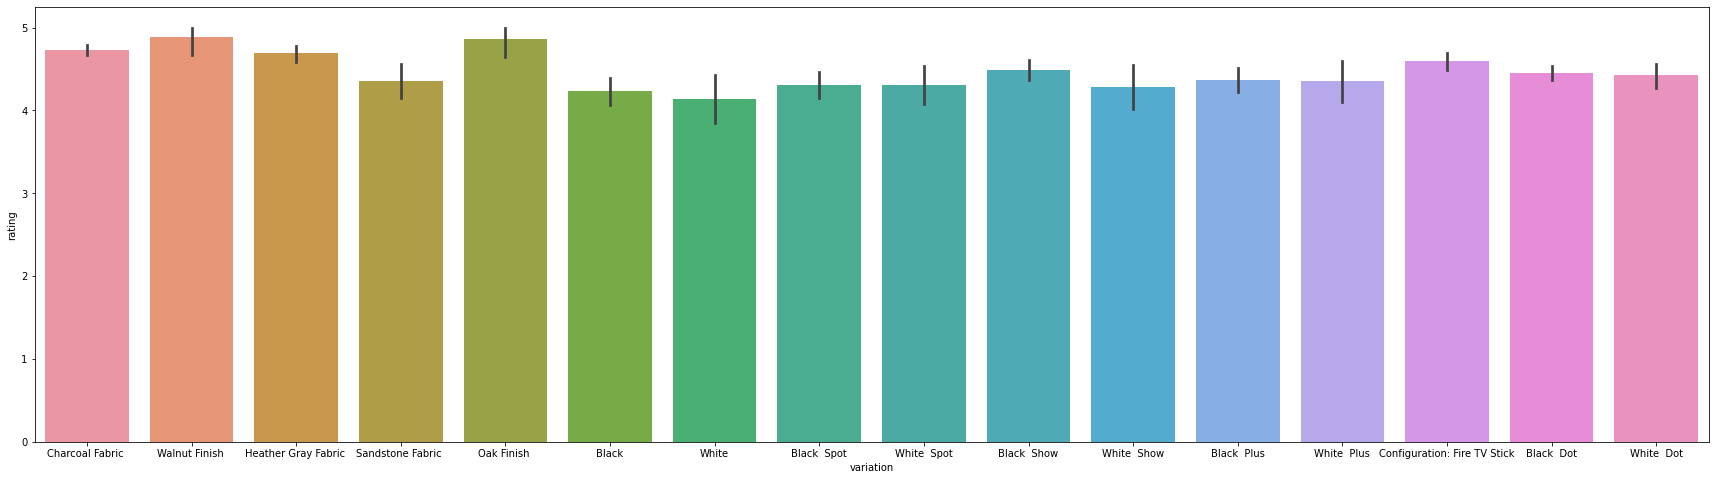

In [23]:
# Verificando as variações dos produtos
plt.figure(figsize=(30,8))
sns.barplot(data=reviews_df, x='variation', y='rating');

Note que as notas são bem parecidas, o que indica que as variações dos produtos não fazem tanta diferença assim. Por exemplo, um *pen drive* de 2 Gb provavelmente recebeu a mesma nota de um *pen drive* similar mas de 8 Gb.

### Nuvem de palavas

Iremos agora gerar uma nuvem de palavras, que consiste em descobrir as palavras mais frequentemente usadas nos reviews. Isto é importante pois pode nos dá um indício das coisas que são mais comentadas sobre os produtos e sobre o serviço.

In [25]:
# Criando uma lista dos reviews
sentences = reviews_df['verified_reviews'].tolist()
len(sentences)

3150

In [27]:
# Visualizando os 5 primeiros comentários
sentences[0:5]

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music']

Um importante passo para geração da nuvem de palavras é deixar todos os comentários em uma string só. Segue então o respectivo código.

In [28]:
# Juntando as sentenças em uma única string
sentences_as_one_string = ' '.join(sentences)
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

In [29]:
# Verificando o número de caracteres
len(sentences_as_one_string)

419105

Gerando agora a nuvem de palavras.

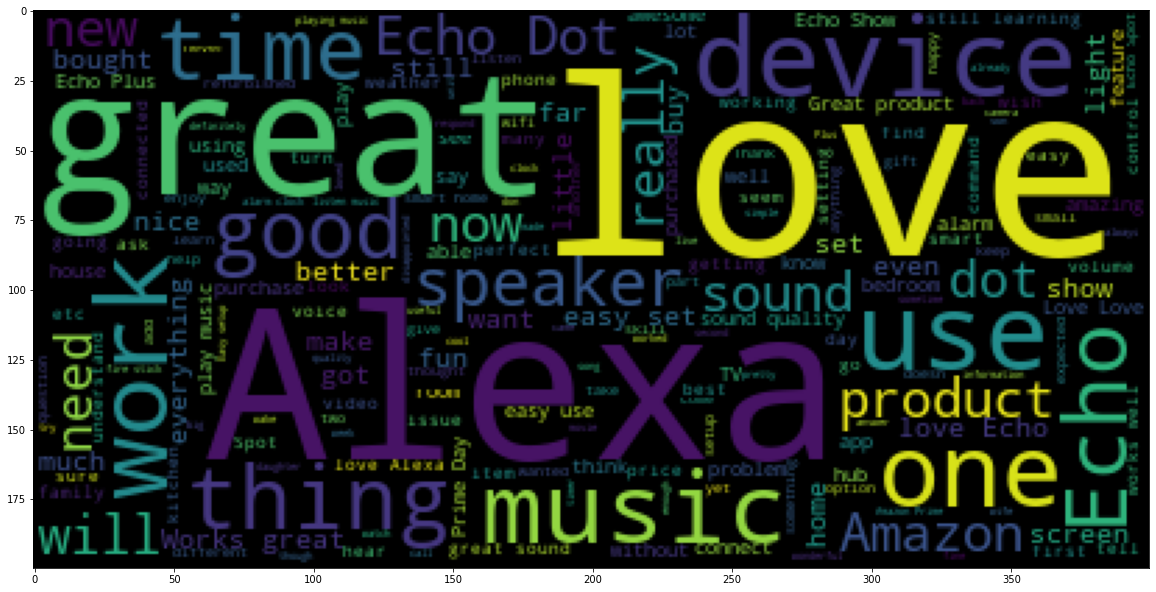

In [32]:
# Importanto a biblioteca
from wordcloud import WordCloud

# Gerando a imagem
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string));

Uma outra etapa que pode ser feita é a geração de uma outra nuvem de palavras considerando apenas os reviews negativos. Para isso, usaremos o dataframe negative, criado anteriormente.

In [35]:
# Criando uma lista com reviews negativos
negative_list = negative['verified_reviews'].tolist()

# Mostrando os 5 primeiros reviews
negative_list[0:5]

["It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals.",
 'Sound is terrible if u want good music too get a bose',
 'Not much features.',
 "Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?",
 'Sad joke. Worthless.']

In [36]:
# Juntando em uma unica string
negative_sentences_as_one_string = ' '.join(negative_list)
negative_sentences_as_one_string

'It\'s like Siri, in fact, Siri answers more accurately then Alexa.  I don\'t see a real need for it in my household, though it was a good bargain on prime day deals. Sound is terrible if u want good music too get a bose Not much features. Stopped working after 2 weeks ,didn\'t follow commands!? Really fun when it was working? Sad joke. Worthless. Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa. It\'s got great sound and bass but it doesn\'t work all of the time. Its still hot or miss when it recognizes things I am not super impressed with Alexa. When my Prime lapsed, she wouldn\'t play anything. She isn\'t smart enough to differentiate among spotify accounts so we can\'t use it for that either. She r

In [37]:
# Verificando o número de caracteres
len(negative_sentences_as_one_string)

55573

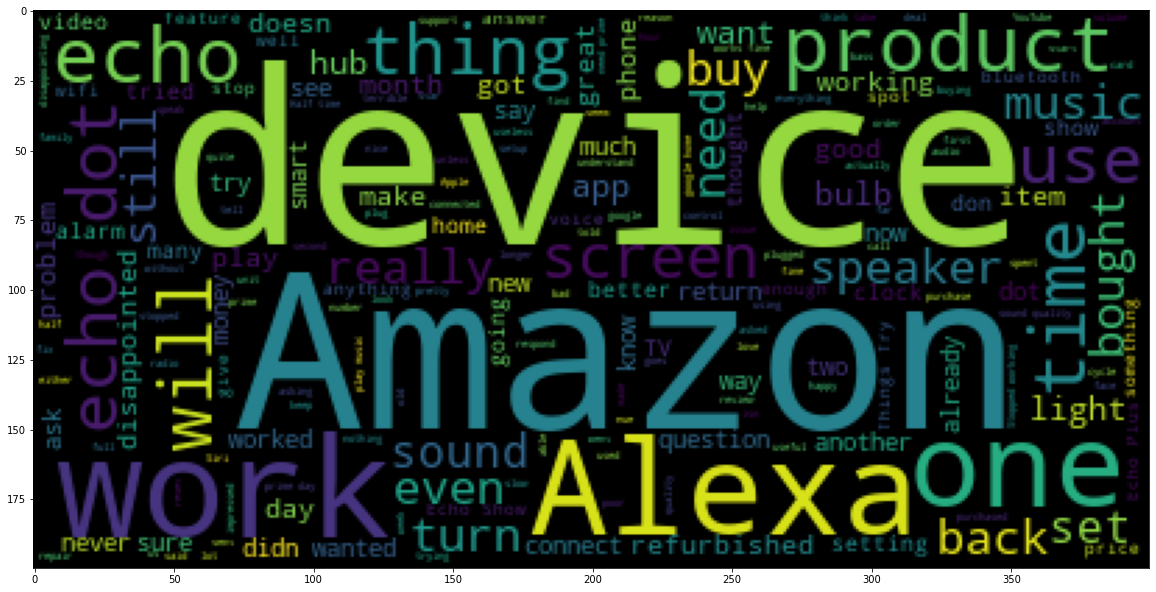

In [39]:
# Gerando a nuvem de palavras
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string));